In [1]:
import nb_utils

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


In [2]:
from lightning_data_modules import HaarDecomposedDataset, ImageDatasets, PairedDataset, SyntheticDataset, SyntheticPairedDataset, Synthetic1DConditionalDataset, SyntheticTimeSeries, SRDataset, SRFLOWDataset, KSphereDataset, MammothDataset, LineDataset, GanDataset #needed for datamodule registration

In [4]:
from lightning_data_modules.utils import create_lightning_datamodule
from configs.utils import read_config
config = read_config('configs/celebA/gan_10.py')
config.data.data_path = '/store/CIA/js2164/data/gan_data'
DataModule = create_lightning_datamodule(config)
DataModule.setup()
train_dataloader = DataModule.train_dataloader()

model.sigma_max: 110.8513


In [7]:
x = next(iter(train_dataloader))

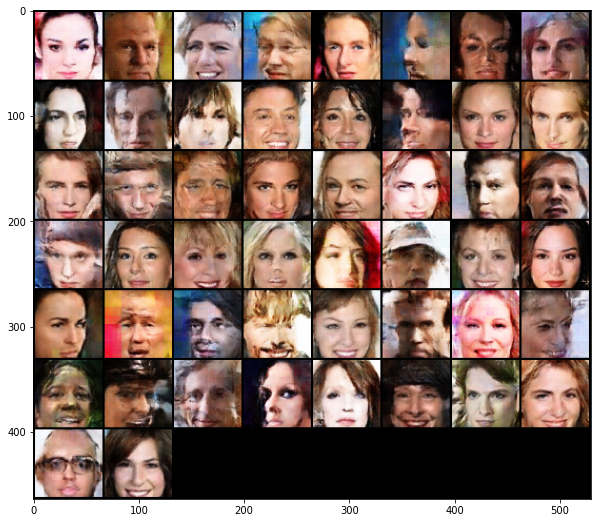

In [6]:
import torchvision
from matplotlib import pyplot as plt
grid_images = torchvision.utils.make_grid(x.cpu(), normalize=True, scale_each=True)
plt.figure(figsize=(10,10))
plt.imshow(grid_images.permute(1,2,0))
plt.show()

In [6]:
x.shape

torch.Size([128, 3, 64, 64])

In [10]:
import torch
import os
import pickle 

latent_dim=10
data_path = '/rds/user/js2164/hpc-work/data/gan_data'
for i in range(10):
    with open(os.path.join(data_path, f'latent_dim_{latent_dim}_part_{i}.pkl'), 'rb') as f:
        X = torch.cat([X, pickle.load(f)])
    

In [11]:
X.shape

torch.Size([110000, 3, 64, 64])

In [22]:
X.element_size() * X.nelement() / 1024 / 1024 /1024

5.035400390625